<a href="https://colab.research.google.com/github/Rogerio-mack/craam/blob/main/GPS_data_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O *Receiver Independent Exchange Format (RINEX)* é um formato de intercâmbio de dados para dados brutos do sistema de navegação por satélite. Isso permite que o usuário pós-processe os dados recebidos para produzir um resultado mais preciso, geralmente com outros dados desconhecidos do receptor original, como melhores modelos das condições atmosféricas no momento da medição.

A saída final de um receptor de navegação geralmente é sua posição, velocidade ou outras grandezas físicas relacionadas. No entanto, o cálculo dessas quantidades é baseado em uma série de medições de uma ou mais constelações de satélites. Embora os receptores calculem posições em tempo real, em muitos casos é interessante armazenar medidas intermediárias para uso posterior. O RINEX é um formato apropriado para isso.

In [162]:
!pip install georinex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
!wget https://data.unavco.org/archive/gnss/rinex/obs/2021/019/ab060190.21d.Z
# !wget https://data.unavco.org/archive/gnss/rinex3/obs/2022/001/AB1100USA_R_20220010000_01D_15S_MO.crx.gz


--2022-09-16 21:49:53--  https://data.unavco.org/archive/gnss/rinex/obs/2021/019/ab060190.21d.Z
Resolving data.unavco.org (data.unavco.org)... 69.44.86.82
Connecting to data.unavco.org (data.unavco.org)|69.44.86.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 697003 (681K) [application/x-compress]
Saving to: ‘ab060190.21d.Z’

ab060190.21d.Z      100%[===================>] 680.67K  3.42MB/s    in 0.2s    

2022-09-16 21:49:53 (3.42 MB/s) - ‘ab060190.21d.Z’ saved [697003/697003]



In [164]:
!gzip -d /content/ab060190.21d.Z
# !gzip -d /content/AB1100USA_R_20220010000_01D_15S_MO.crx.gz

In [165]:
!python -m georinex.read /content/ab060190.21d
# !python -m georinex.read /content/AB1100USA_R_20220010000_01D_15S_MO.crx 


<xarray.Dataset>
Dimensions:  (time: 5760, sv: 31)
Coordinates:
  * time     (time) object 2021-01-19 ... 2021-01-19T23:59:45
  * sv       (sv) object 'G01' 'G02' 'G03' 'G04' ... 'G29' 'G30' 'G31' 'G32'
Data variables:
    L1       (time, sv) float64 nan nan nan nan ... nan -1.441e+07 nan nan
    L2       (time, sv) float64 nan nan nan nan ... nan -1.113e+07 nan nan
    C1       (time, sv) float64 nan nan nan nan ... nan 2.308e+07 nan nan
    P2       (time, sv) float64 nan nan nan nan ... nan 2.308e+07 nan nan
    P1       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    S1       (time, sv) float64 nan nan nan nan 38.0 ... 49.2 nan 43.1 nan nan
    S2       (time, sv) float64 nan nan nan nan 21.7 ... 42.4 nan 31.8 nan nan
Attributes:
    version:          1.0
    interval:         15.0
    rinextype:        obs
    fast_processing:  0
    time_system:      GPS
    filename:         ab060190.21d
    rxmodel:          TRIMBLE NETRS
    position:         [-3524499.4

In [166]:
import georinex as gr

In [167]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [168]:
# fname = '/content/mah22800.15o'
fname = '/content/ab060190.21d'

# dat = gr.load(fname, tlim=['2015-10-17T06:00', '2015-10-17T08:00'])
obs = gr.load(fname)

In [169]:
obs

<xarray.Dataset>
Dimensions:  (time: 5760, sv: 31)
Coordinates:
  * time     (time) object 2021-01-19 ... 2021-01-19T23:59:45
  * sv       (sv) object 'G01' 'G02' 'G03' 'G04' ... 'G29' 'G30' 'G31' 'G32'
Data variables:
    L1       (time, sv) float64 nan nan nan nan ... nan -1.441e+07 nan nan
    L2       (time, sv) float64 nan nan nan nan ... nan -1.113e+07 nan nan
    C1       (time, sv) float64 nan nan nan nan ... nan 2.308e+07 nan nan
    P2       (time, sv) float64 nan nan nan nan ... nan 2.308e+07 nan nan
    P1       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    S1       (time, sv) float64 nan nan nan nan 38.0 ... 49.2 nan 43.1 nan nan
    S2       (time, sv) float64 nan nan nan nan 21.7 ... 42.4 nan 31.8 nan nan
Attributes:
    version:          1.0
    interval:         15.0
    rinextype:        obs
    fast_processing:  0
    time_system:      GPS
    filename:         ab060190.21d
    rxmodel:          TRIMBLE NETRS
    position:         [-3524499.4745, -1049128.1472, 5194460.0436]

In [170]:
df = obs.to_dataframe()
df.head()

L1           L2            C1            P2  \
time                sv                                                         
2021-01-19 00:00:00 G01         NaN          NaN           NaN           NaN   
                    G02         NaN          NaN           NaN           NaN   
                    G03         NaN          NaN           NaN           NaN   
                    G04         NaN          NaN           NaN           NaN   
                    G05  3049222.78  2608530.589  2.486674e+07  2.486673e+07   

                         P1    S1    S2  
time                sv                   
2021-01-19 00:00:00 G01 NaN   NaN   NaN  
                    G02 NaN   NaN   NaN  
                    G03 NaN   NaN   NaN  
                    G04 NaN   NaN   NaN  
                    G05 NaN  38.0  21.7

In [171]:
df.tail()

L1            L2            C1  \
time                sv                                              
2021-01-19 23:59:45 G28 -2.306031e+07 -1.576035e+07  2.098119e+07   
                    G29           NaN           NaN           NaN   
                    G30 -1.440898e+07 -1.113268e+07  2.307783e+07   
                    G31           NaN           NaN           NaN   
                    G32           NaN           NaN           NaN   

                                   P2  P1    S1    S2  
time                sv                                 
2021-01-19 23:59:45 G28  2.098118e+07 NaN  49.2  42.4  
                    G29           NaN NaN   NaN   NaN  
                    G30  2.307782e+07 NaN  43.1  31.8  
                    G31           NaN NaN   NaN   NaN  
                    G32           NaN NaN   NaN   NaN

In [172]:
df.columns

Index(['L1', 'L2', 'C1', 'P2', 'P1', 'S1', 'S2'], dtype='object')

In [173]:
df.index

MultiIndex([(2021-01-19 00:00:00, 'G01'),
            (2021-01-19 00:00:00, 'G02'),
            (2021-01-19 00:00:00, 'G03'),
            (2021-01-19 00:00:00, 'G04'),
            (2021-01-19 00:00:00, 'G05'),
            (2021-01-19 00:00:00, 'G06'),
            (2021-01-19 00:00:00, 'G07'),
            (2021-01-19 00:00:00, 'G08'),
            (2021-01-19 00:00:00, 'G09'),
            (2021-01-19 00:00:00, 'G10'),
            ...
            (2021-01-19 23:59:45, 'G23'),
            (2021-01-19 23:59:45, 'G24'),
            (2021-01-19 23:59:45, 'G25'),
            (2021-01-19 23:59:45, 'G26'),
            (2021-01-19 23:59:45, 'G27'),
            (2021-01-19 23:59:45, 'G28'),
            (2021-01-19 23:59:45, 'G29'),
            (2021-01-19 23:59:45, 'G30'),
            (2021-01-19 23:59:45, 'G31'),
            (2021-01-19 23:59:45, 'G32')],
           names=['time', 'sv'], length=178560)

In [174]:
df.loc[ ( slice(None), 'G02' ), :] 

,,L1,L2,C1,P2,P1,S1,S2
time,sv,,,,,,,
2021-01-19 00:00:00,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:15,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:30,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:45,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:01:00,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-19 23:58:45,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 23:59:00,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 23:59:15,G02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df2 = df.loc[ ( slice(None), 'G02' ), :] 
df2 = df2.reorder_levels([1,0])
df2.head()

L1  L2  C1  P2  P1  S1  S2
sv  time                                           
G02 2021-01-19 00:00:00 NaN NaN NaN NaN NaN NaN NaN
    2021-01-19 00:00:15 NaN NaN NaN NaN NaN NaN NaN
    2021-01-19 00:00:30 NaN NaN NaN NaN NaN NaN NaN
    2021-01-19 00:00:45 NaN NaN NaN NaN NaN NaN NaN
    2021-01-19 00:01:00 NaN NaN NaN NaN NaN NaN NaN

In [176]:
df2 = df2.loc[ ( 'G02',slice(None) ) ]
df2.head()

,L1,L2,C1,P2,P1,S1,S2
time,,,,,,,
2021-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df2.index = pd.to_datetime( df2.index )


In [178]:
df2 = df2[ df2.index.hour < 10 ]
df2.head()

,L1,L2,C1,P2,P1,S1,S2
time,,,,,,,
2021-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df2.tail()

,L1,L2,C1,P2,P1,S1,S2
time,,,,,,,
2021-01-19 09:58:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 09:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 09:59:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 09:59:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19 09:59:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


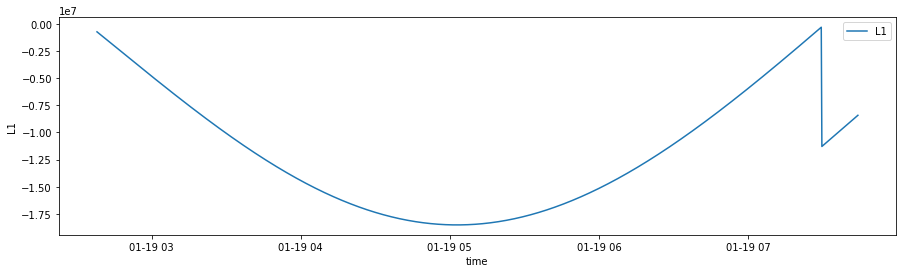

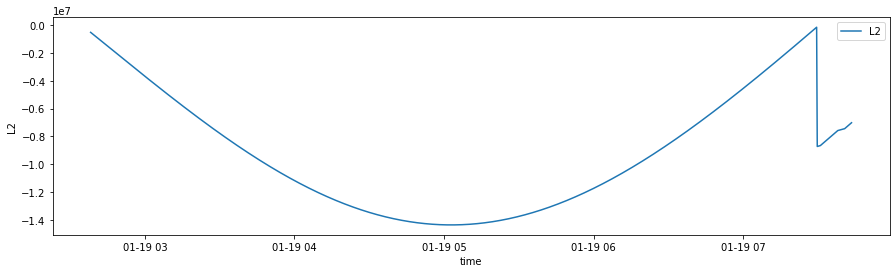

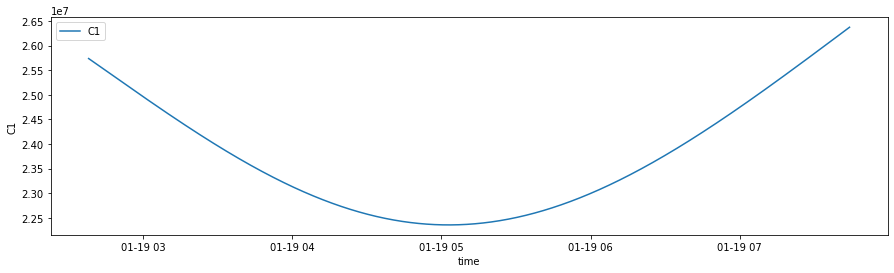

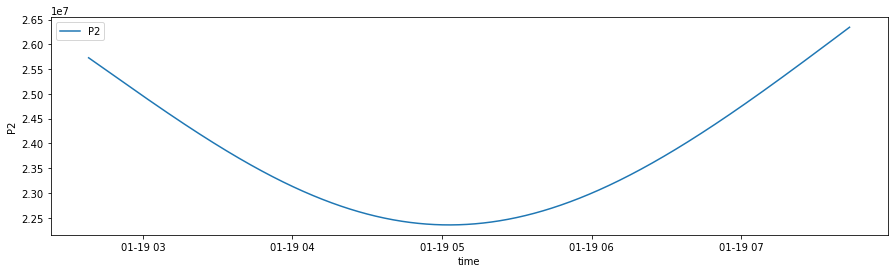

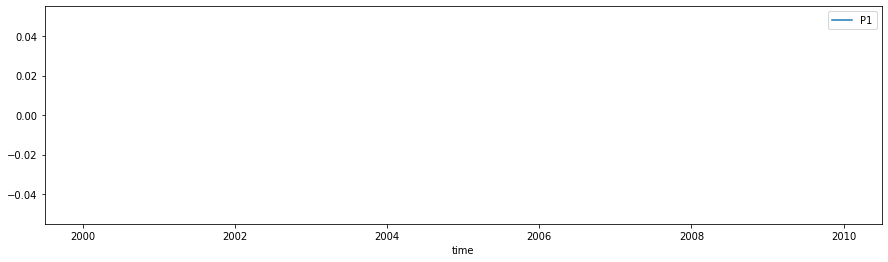

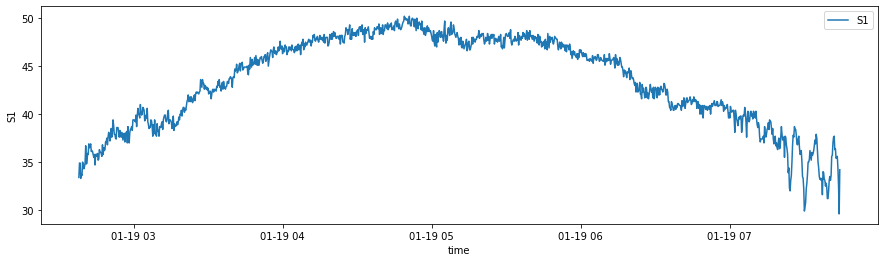

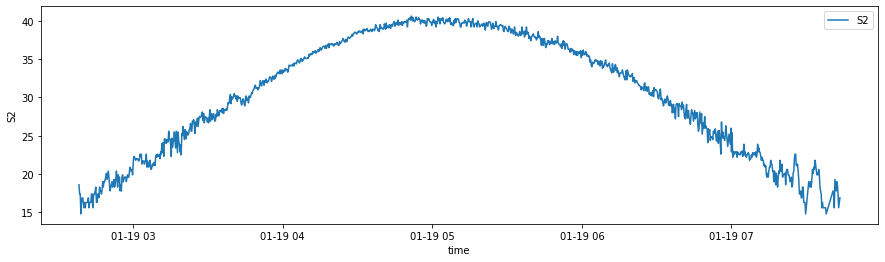

In [180]:
for c in df:
  fig, ax = plt.subplots(figsize=(15,4))
  sns.lineplot(x=df2.index, y=df2[c], label=c, ax=ax)
  plt.legend()
  plt.show()

